<a href="https://colab.research.google.com/github/johyunkang/py_pandas/blob/main/python_ml_perfect_guide_04_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Chapter 04 분류
### 01 분류(Classification)의 개요

앙상블 기법(Ensemble Method)
- 배깅(Bagging)
 - 랜덤 포레스트(Random Forest) : 뛰어난 예측 성능, 상대적으로 빠른 수행 시간, 유연성
- 부스팅(Boosting)
 - 그래디언트 부스팅(Gradient Boosting) : 뛰어난 예측성능, 수행 시간이 너무 오래 걸림
 - XgBoost(eXtra Gradient Boost), LightGBM
- 스태킹(Stacking) : 앙상블의 앙상블 기법

### 02 결정 트리 (Decision Tree)
![decision-tree](https://user-images.githubusercontent.com/291782/139259554-404aa34c-c7bb-48e8-8446-2d928a4672ad.png)

- 규칙노드(Decision Node) : 규칙조건이 있는 노드
- 리프노드(Leaf Node) : 결정된 클래스 값
- 새로운 규칙조건 마다 서브트리가 생성됨
- 트리의 깊이가 깊어질수록 결정 트리의 예측 성능이 저하될 가능성이 높다. (과적합(Overfitting))


결정 트리 장점
- 쉽다. 직관적
- 피처의 스케일링이나 정규화 등의 사전 가공 영향도가 크지 않음


결정 트리 단점
- 과적합으로 알고리즘 성능이 떨어진다. 이를 극복하기 위해 트리의 크기를 사전에 제한하는 튜닝 필요



DecisionTreeClassifier 와 DecisionTreeRegressor 파라미터 설명
- min_samples_split
 - 노드를 분할하기 위한 최소한의 샘플 데이터 수로 과적합을 제어하는데 사용됨
 - 디폴트는 2이고, 작게 설정할수록 분할되는 노드가 많아져서 과적합 가능성 증가
 - 과적합을 제어. 1로 설정할 경우 분할되는 노드가 많아져서 과적합 가능성 증가
- min_samples_leaf
 - 말단 노드(Leaf)가 되기 위한 최소한의 샘플 데이터 수
 - Min_samples_split와 유사하게 과적합 제어 용도. 그러나 비대칭적(imbalanced) 데이터의 경우 특정 클래스의 데이터가 극도로 작을 수 있으므로 이 경우는 작게 설정 필요
- max_feature
 - 최적의 분할을 위해 고려할 최대 피처 개수. 디폴트는 None으로 데이터 세트의 모든 피처를 사용해 분할 수행
 - int형으로 지정하면 대상 피처의 개수, float형으로 지정하면 전체 피처 중 대상 피처의 퍼센트임
 - 'sqrt'는 전체 피처 중 sqrt(전체 피처 개수). 즉 $sqrt{전체피처개수}$ 만큼 선정
 - 'auto'로 지정하면 'sqrt'와 동일
 - 'log'는 전체 피정 중 log2(전체 피처 개수) 선정
 - 'None'은 전체 피처 선정
- max_depth
 - 트리의 최대 깊이를 규정
 - 디폴트는 None. None으로 설정하면 완벽하게 클래스 결정 값이 될 때까지 깊이를 계속 키우며 분할하거나 노드가 가지는 데이터 개수가 min_samples_split 보다 작아질 때까지 계속 깊이를 증가시킴.
 - 깊이가 깊어지면 min_samples_split 설정대로 최대 분할하여 과적합할 수 있으므로 적절한 값으로 제어 필요
- max_leaf_nodes
 - 말단 노드(Leaf)의 최대 개수

#### 결정 트리 모델의 시각화
**Graphviz**를 윈도우에 설치 필요  
Graphviz는 파이썬으로 개발된 패키지가 아님

설정방법
1. https://graphviz.gitlab.io/_pages/Download/Download_windows.html 경로에서 시스템에 맞게 내려받은 뒤 설치
2. 1의 경로 파일을 설치 했으면 Graphviz의 파이썬 래퍼 모듈을 PIP를 이용해 설치 (cmd를 관리자 권한으로 실행 후 아래 명령어 실행)
```python
pip install graphviz
```

자세한 설명은 p.191 참조

In [1]:
pip install graphviz

In [2]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

# DecisionTreeClassifier 생성
dt = DecisionTreeClassifier(random_state=111)

# 붓꽃 데이터 로딩 후 학습 과 테스트 데이터 세트로 분리
iris_data = load_iris()
x_train, x_test, y_train, y_test = train_test_split(iris_data.data, iris_data.target, test_size=0.2, random_state=111)

# DT 학습
dt.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=111, splitter='best')

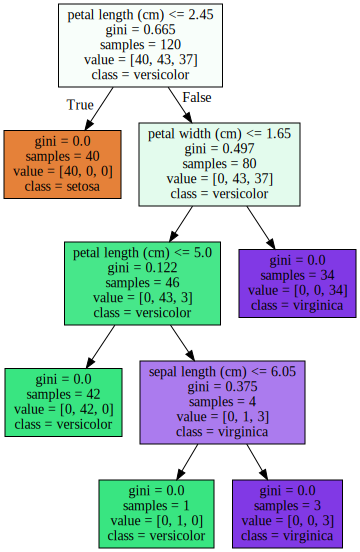

In [14]:
from sklearn.tree import export_graphviz

# !! Google Colab 방법과 주피터 노트북 방법은 다름

# 주피터 노트북 방법 1/2
# export_graphviz() 의 호출결과로 out_file로 지정된 tree.dot 파일을 생성함
#export_graphviz(dt, out_file="tree.dot", class_name=iris_data.target_names, feature_names = iris_data.feature_names, impurity=True, filled=True)


import graphviz
# # 위에서 생성된 tree.dot 파일을 graphviz가 읽어서 주피터 노트북상에서 시각화
# 주피터 노트북 방법 2/2
# with open("tree.dot") as f:
#     dot_graph = f.read()
# graphviz.Source(dot_graph)


# 구글 코랩 방법 1/1
dot_data = export_graphviz(dt
                        #   , max_depth=3
                          , feature_names=iris_data.feature_names
                          , class_names=iris_data.target_names
                          , filled=True
                          , impurity=True
                        #  , proportion=True
                          )
display(graphviz.Source(dot_data))

### 결정 트리 과적합(Overfitting)

결정 트리가 어떻게 학습 데이터를 분할해 예측을 수행하는 지와 이로 인한 과적합 문제를 시각화해 알아보겠음

2개의 피처가 3가지 유형의 클래스 값을 가지는 데이터 세트를 만들고 이를 그래프 형태로 시각화하겠음.

[0 1 1 1 2 2 1 0 2 2 0 1 2 1 2 0 0 1 2 1 2 0 1 2 1 0 2 2 2 0 2 1 1 0 1 0 0
 2 1 0 0 1 0 2 0 2 1 0 2 0 2 2 2 1 0 1 1 0 2 0 2 0 0 2 1 1 0 1 1 2 1 0 2 2
 2 0 0 1 1 0 2 1 2 1 0 2 1 1 1 1 0 0 1 0 2 2 0 2 0 0]


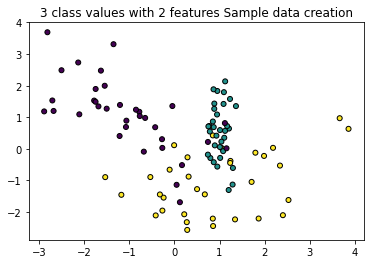

In [19]:
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
#%matplotlib inline

plt.title('3 class values with 2 features Sample data creation')

# 2차원 시각화를 위해서 피처는 2개, 클래스는 3가지 유형의 분류 샘플 데이터 생성.
x_features, y_labels = make_classification(n_features=2, n_redundant=0, n_informative=2,
                                           n_classes=3, n_clusters_per_class=1, random_state=0)

# print(x_features) # ndarray data
# print(y_labels) # 0 1 2 숫자들

# 그래프 형태로 2개의 피처로 2차원 좌표 시각화, 각 클래스 값은 다른 색깔로 표시됨
plt.scatter(x_features[:, 0], x_features[:, 1], marker='o', c=y_labels, s=25, edgecolor='k')
